In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from scipy.signal import butter, lfilter

from scipy import stats

import librosa, librosa.display
from scipy.signal import hilbert, chirp
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

%matplotlib inline

x, sr = librosa.load('audio/demo/CF010001_081.wav')
x, index = librosa.effects.trim(x,top_db= 20)
x = stats.zscore(x)


def bandpower(data, sf, band, window_sec=None, relative=False):
    from scipy.signal import welch
    import scipy
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = scipy.signal.welch(data, sf,window = 'hamming',nfft = 512 ,scaling = 'density',average = 'mean')
#     if peak:
#         stats = dict(zip(freqs, psd))
#         peak_amp = (max(psd))
#         peak_freq = (max(stats, key=stats.get))
#         return peak_amp, peak_freq
    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)  # assignment operator shorthand for / and =
        
    return freqs, psd ,bp
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butt_low(lowcut, fs, order=5):
    nyq = 0.5 * sr
    low = lowcut / nyq
    b, a = butter(order, low, btype='low')
    return b, a


fs = sr
#frequency range
edges = [100,300,700,1950,3900,7250];       
lowcut = edges[:-1]
highcut = edges[1:]

af_s = []
env = []


af_s = []
env = []
for i in range(len(lowcut)): 
    y = butter_bandpass_filter(x, lowcut[i], highcut[i], fs , order=2)
    af_s.append(y)
    print('band pass frequency range is {} - {}'.format(lowcut[i], highcut[i]))
    analytic_signal = hilbert(y)
    amplitude_envelope = librosa.resample(np.abs(analytic_signal),sr,1050)
    
    amplitude_envelope = np.abs(analytic_signal)
    env.append(amplitude_envelope)
# for i in range(len(lowcut)): 
#     y = butter_bandpass_filter(x, lowcut[i], highcut[i], fs , order=2)
#     af_s.append(y)
#     #plt.plot(y)
#     print('band pass frequency range is {} - {}'.format(lowcut[i], highcut[i]))
#     #analytic_signal = hilbert(y)
#     #amplitude_envelope = librosa.resample(np.abs(analytic_signal),sr,1050)
    
#     amplitude_envelope = np.abs(y)
#     b, a = butt_low(40, fs, order=4)
#     z = lfilter(b, a, amplitude_envelope)
#     env.append(z)
#     #y_down = librosa.resample(z, sr, 80)
#     #z = y_down - np.mean(y_down)
#     #plt.plot(y);plt.show()
#     #plt.plot(x,alpha=0.5);plt.plot(y,alpha=0.8);plt.plot(z,'c-.',linewidth=4, markersize=12);plt.show()
#     #plt.plot(z,'b');plt.show()
#     #plt.ylim(-0.10,0.20)

band pass frequency range is 100 - 300
band pass frequency range is 300 - 700
band pass frequency range is 700 - 1950
band pass frequency range is 1950 - 3900
band pass frequency range is 3900 - 7250


af_s = []
env = []
for i in range(len(lowcut)): 
    y = butter_bandpass_filter(x, lowcut[i], highcut[i], fs , order=2)
    af_s.append(y)
    print('band pass frequency range is {} - {}'.format(lowcut[i], highcut[i]))
    analytic_signal = hilbert(y)
    amplitude_envelope = librosa.resample(np.abs(analytic_signal),sr,1050)
    
    #amplitude_envelope = np.abs(analytic_signal)
    env.append(amplitude_envelope)
    #b, a = butt_low(40, fs, order=4)
    #z = lfilter(b, a, amplitude_envelope)
    #env.append(z)
    #y_down = librosa.resample(z, sr, 80)
    #z = y_down - np.mean(y_down)
    #plt.plot(y);plt.show()
    #plt.plot(x,alpha=0.5);plt.plot(y,alpha=0.8);plt.plot(z,'c-.',linewidth=4, markersize=12);plt.show()
    #plt.plot(z,'b');plt.show()
    #plt.ylim(-0.10,0.20)
    #plt.plot(z)

In [2]:
t_main = np.arange(len(x)) / sr #  create a time _ vector

28672

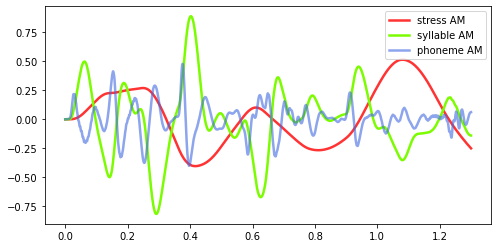

In [3]:
#modulation_filter = [2,4,8,16,32,64];    
#modulation_filter = [0.1,0.9,2.5,12,40] 
modulation_filter = [0.1,0.9,2.5,12,40] 

#Fcor = [0.1; 0.9; 2.5; 12; 40];  
lowcut = modulation_filter[:-1]
highcut = modulation_filter[1:]

modu = []
final = []
for j in range(len(env)):  
    for i in range(len(lowcut)):
        modu = []
        y= butter_bandpass_filter(env[j], lowcut[i], highcut[i], fs , order=2)
        #print('band pass frequency range is {} - {}'.format(lowcut[i], highcut[i]))
        modu.append((y))
        final = final + modu
        #plt.plot(y);plt.show()
len(final)

fig= plt.figure(figsize=(8,4))
db_1 = librosa.amplitude_to_db(final[1])
plt.plot(t_main,(final[1]),'red',linestyle='-',linewidth=2.5,alpha=0.8)
plt.plot(t_main,final[2],'lawngreen',linestyle='-',linewidth=2.5)
plt.plot(t_main,final[3],'royalblue',linewidth=2.5,alpha = 0.6)
plt.legend(['stress AM','syllable AM','phoneme AM'])
#plt.plot(t_main,db_1)

#plt.plot(t_main,final[0])
len(t_main)

the duration of this wav is 1.3003174603174603 s


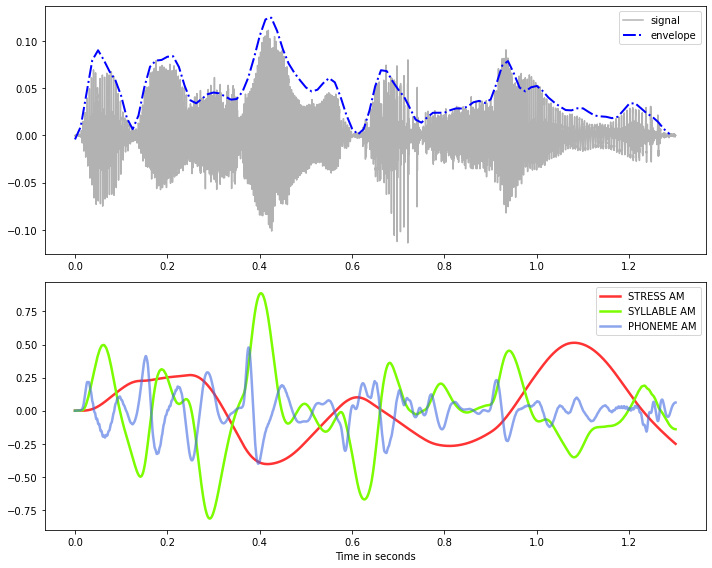

In [4]:
# need to trim the sli at beging and end before process. 类似的论文中 首先采取了VAD 删掉了无音段；demo中只做了前后trim;

#x, sr = librosa.load('audio/th.wav')
x, sr = librosa.load('audio/demo/CF010001_081.wav')

# Trim the beginning and ending silence
x, index = librosa.effects.trim(x,top_db= 20 )
n = librosa.get_duration(x, sr)
t = np.arange(len(x)) / sr #  create a time _ vector
print('the duration of this wav is {} s'.format(n))
#normalized = (x-min(x))/(max(x)-min(x))
#samples = int(sr*n)
## 获取包络 （two major ways : half-wave and low pass;  hilbert and low pass ）
analytic_signal = hilbert(x)
amplitude_envelope = np.abs(analytic_signal)
y = amplitude_envelope
#Xdb = librosa.amplitude_to_db(amplitude_envelope)
# follow the paper ： downsample到 80hz 然后 mean substract
y = amplitude_envelope
y = librosa.resample(y, sr, 80)
#y = y_down - np.mean(y_down)
# created a new time vector
samples = int(80*n)
t2 = np.arange(samples) / 80
y = y[:-1]
y.shape
t.shape
#plt.plot(t,x,'grey',alpha=0.6);plt.plot(t2,y,'b-.',linewidth = 2)

fig= plt.figure(figsize=(10,8))
#plt.rcParams['figure.figsize'] = (8, 5)
#fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, x,'grey',label='signal',alpha=0.6)
ax0.plot(t2,y,'b-.',linewidth = 2)
ax0.legend(['signal','envelope'])

ax1 = fig.add_subplot(212)
ax1.set_xlabel("Time in seconds")
#ax0.set_title('broadband envelop')
ax1.plot(t,(final[1]),'red',linestyle='-',linewidth=2.5,alpha=0.8)
ax1.plot(t,final[2],'lawngreen',linestyle='-',linewidth=2.5)
ax1.plot(t,final[3],'royalblue',linewidth=2.5,alpha = 0.6)
#plt.legend(['stress AM','syllable AM','phoneme AM'])
ax1.legend(['STRESS AM','SYLLABLE AM','PHONEME AM'])
#plt.grid(True)
plt.tight_layout()
#plt.plot(t_main,db_1)

In [5]:
fig.savefig('ss1.svg',format='svg')

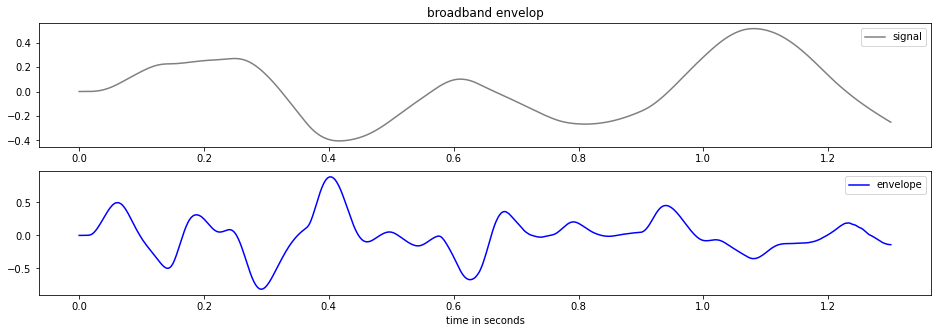

In [6]:
plt.rcParams['figure.figsize'] = (16, 5)
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t_main, final[1],'grey',label='signal')
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t_main, final[2],'b-',label='envelope')
ax1.set_xlabel("time in seconds")
ax0.set_title('broadband envelop')
ax1.legend()

In [7]:
# from entropy import *
# import numpy as np

# #print(perm_entropy(final[2], order=3, normalize=True))                 # Permutation entropy
# #print(spectral_entropy(final[1], 100, method='welch', normalize=True)) # Spectral entropy
# #print(svd_entropy(final[1], order=3, delay=1, normalize=True))         # Singular value decomposition entropy
# #print(app_entropy(final[1], order=2, metric='chebyshev'))              # Approximate entropy
# print(sample_entropy(final[1], order=2, metric='chebyshev'))           # Sample entropy
# print(sample_entropy(final[2], order=2, metric='chebyshev'))           # Sample entropy
# print(sample_entropy(final[3], order=2, metric='chebyshev'))           # Sample entropy

28672

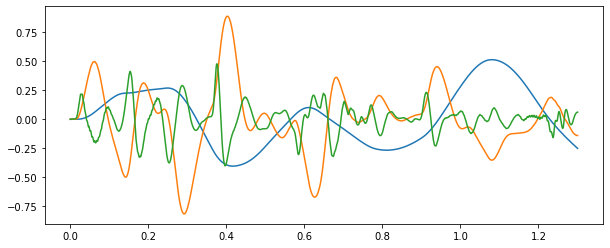

In [8]:
fig= plt.figure(figsize=(10,4))
db_1 = librosa.amplitude_to_db(final[1])
plt.plot(t_main,(final[1]))
plt.plot(t_main,final[2])
plt.plot(t_main,final[3])
#plt.plot(t_main,db_1)

#plt.plot(t_main,final[0])
len(t_main)

In [9]:
# stress am
all_result = []
stress_am = np.arange(1,20,4)
syllable_am = np.arange(2,20,4)
phoneme_am = np.arange(3,20,4)
for i in range(5):
    s1 = librosa.resample(final[stress_am[i]],22050,1050)
    s2 = librosa.resample(final[syllable_am[i]],22050,1050)
    s3 = librosa.resample(final[phoneme_am[i]],22050,1050)
    al1 = np.angle(hilbert(s1),deg=False)
    al2 = np.angle(hilbert(s2),deg=False)
    al3 = np.angle(hilbert(s3),deg=False)
    phase_synchrony = 1-np.sin(np.abs(al1 -  al2)/2)
    phase_synchrony_2 = 1-np.sin(np.abs( al2 -  al3)/2)

    N = len(al1)
    s = [np.average(phase_synchrony),np.average(phase_synchrony_2)]
    all_result.append(s)
    print(np.average(phase_synchrony),',',np.average(phase_synchrony_2))
# import numpy as np
# np.savez('singal.npz', data1=af_s)

0.22319971478568873 , 0.2872867571680887
0.28017861479277245 , 0.28889160276812664
0.18664983759822096 , 0.27744903744119975
0.212899549750417 , 0.2716894980804139
0.2430991932365873 , 0.29519260586048246


In [10]:
all_result

[[0.22319971478568873, 0.2872867571680887],
 [0.28017861479277245, 0.28889160276812664],
 [0.18664983759822096, 0.27744903744119975],
 [0.212899549750417, 0.2716894980804139],
 [0.2430991932365873, 0.29519260586048246]]

In [11]:
# hop = int(np.round(0.256*sr))
# length = int(np.round(0.064*sr)) 帧长和帧移 

In [12]:
x = final[1]
hop_length = 256  
frame_length = 512 
energy = numpy.array([
    sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)
])
#energy.append(energy)
#db = librosa.core.power_to_db(energy, ref=1.0, amin=1e-10, top_db=80.0l)
#plt.plot(energy)
rmse = librosa.feature.rms(final[2], frame_length=frame_length, hop_length=hop_length, center=True)
rmse = rmse[0]
rmse = rmse[:-1]
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)


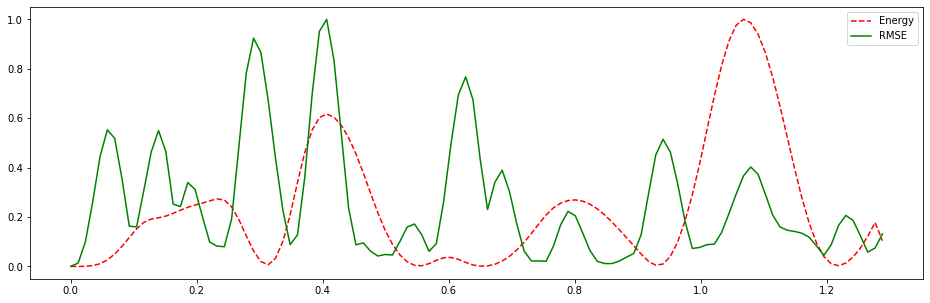

In [13]:
#librosa.display.waveplot(final[1], sr=sr, alpha=0.4)
#plt.plot(t, db,'b--')             # normalized for visualization
plt.plot(t, energy/energy.max(), 'r--')             # normalized for visualization
plt.plot(t[:len(rmse)], rmse/rmse.max(), color='g') # normalized for visualization
plt.legend(('Energy', 'RMSE'))

In [14]:
energy_all = []
for i in range(len(final)):
    x = final[i]
    hop_length = 256   # 有点断; 
    frame_length = 512
    energy = numpy.array([
        sum(abs(x[i:i+frame_length]**2))
        for i in range(0, len(x), hop_length)
    ])
    energy_all.append(energy)
E = np.array(energy_all)
E_re = E.reshape(5,6,len(energy))

ValueError: cannot reshape array of size 2240 into shape (5,6,112)

In [ ]:
E_mean = np.mean(E_re,2)
E_mean.shape

In [ ]:
#s = E_re[:,:,0]
s = E_mean
x = np.linspace(1,7,7)
y = np.linspace(1,6,6)
T, F = np.meshgrid(x,y) 
#X_plot = 10 * np.log10(s[:,:].transpose() + np.finfo(float).eps) 
plt.pcolormesh(F, T, s)
xtk = ['2','4','8','16','32','64',]
ytk = ['10','100','300','700','1750','3900','7250']
plt.xticks(y,xtk)
plt.yticks(x,ytk)
plt.ylabel('acoustic frequency : HZ')
plt.ylabel('modulation frequency : HZ')
plt.colorbar()

In [ ]:
#s = E_re[:,:,3]
plt.rcParams['figure.figsize'] = (10, 6)
s = E_mean
from mpl_toolkits.mplot3d import Axes3D
#x = np.linspace(1,7,7)
#y = np.linspace(6,1,6)
x = np.linspace(1,6,6)
y = np.linspace(5,1,5)
T, F = np.meshgrid(x,y) 
fig = plt.figure()
ax = fig.gca(projection='3d') # 绘制成3D
ax.plot_surface(F,T,s,cmap='bwr')
#ax.plot_surface(T[None,:], F[:,None], 10*np.log10(Zxx), cmap='plasma')
plt.xticks(y,xtk)
plt.yticks(x,ytk)
plt.ylabel('acoustic frequency : HZ')
plt.xlabel('modulation frequency : HZ')

In [ ]:
## testing stfft 
s = env
import scipy.signal as signal
winsec = 0.256 
win_shift = 0.04
nperseg = round(winsec * fs)
noverlap = round(win_shift/fs)
for ep in s:
    fs = sr
    f, t, Zxx = signal.stft(ep, fs,window='hamming',nperseg = nperseg,noverlap = noverlap)
    plt.pcolormesh(t, f, np.abs(Zxx))
    plt.ylim([0,32])
    #plt.title('STFT Magnitude')
    #plt.ylabel('Frequency [Hz]')
    #plt.xlabel('Time [sec]')
    plt.show()
    #plt.colorbar()

    #plt.pcolormesh(t, f, np.abs(Zxx), cmap=plt.get_cmap('plasma'))

In [ ]:
X_ma = []
for signal in af_s:
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal) 
    #b, a = butt_low(30, fs, order=4)
    #y = lfilter(b, a, amplitude_envelope)
    y = amplitude_envelope
    y_down = librosa.resample(y, sr, 80)
    y = y_down - np.mean(y_down)
    #plt.plot(y);plt.show()
    
    freqs,psd,bp = bandpower(y, 80, [3, 6])
    #print(freqs,psd)
    stats = dict(zip(freqs, psd))
    peak_amp = (max(psd))
    peak_freq = (max(stats, key=stats.get))
    print('the peak am and peak freq(hz) is {} and {}'.format(peak_amp,peak_freq))
#     X = scipy.fft(y)
#     X_mag = np.absolute(X)
#     X_ma.append(X_mag)
#     f = np.linspace(0, 80, len(X_mag)) # frequency variable
    X_ma.append(psd)
    plt.xlim([0, 16])
    plt.plot(freqs,psd/max(psd))# Frequency spectrum
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Power Spctrum')
    plt.show()

#     plt.show()

In [ ]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from scipy.signal import butter, lfilter
import librosa, librosa.display
from scipy.signal import hilbert, chirp
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

%matplotlib inline

x, sr = librosa.load('audio/rhythm_pattern_df/jp1.wav')
x, index = librosa.effects.trim(x,top_db= 20)


###

#parameter control  
###

def bandpower(data, sf, band, window_sec=None, relative=False):
    from scipy.signal import welch
    import scipy
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = scipy.signal.welch(data, sf,window = 'hamming',nfft = 512 ,scaling = 'density',average = 'mean')
#     if peak:
#         stats = dict(zip(freqs, psd))
#         peak_amp = (max(psd))
#         peak_freq = (max(stats, key=stats.get))
#         return peak_amp, peak_freq
    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)  # assignment operator shorthand for / and =
        
    return freqs, psd ,bp
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butt_low(lowcut, fs, order=5):
    nyq = 0.5 * sr
    low = lowcut / nyq
    b, a = butter(order, low, btype='low')
    return b, a


fs = sr
#frequency range
edges = [10,100,300,700,1750,3900,7250];       
lowcut = edges[:-1]
highcut = edges[1:]

af_s = []
env = []

for i in range(len(lowcut)): 
    plt.rcParams['figure.figsize'] = (16, 5)
    y = butter_bandpass_filter(x, lowcut[i], highcut[i], fs , order=2)
    af_s.append(y)
    print('band pass frequency range is {} - {}'.format(lowcut[i], highcut[i]))
    #analytic_signal = hilbert(y)
    #amplitude_envelope = np.abs(analytic_signal)
    
    amplitude_envelope = np.abs(y)
    b, a = butt_low(30, fs, order=4)
    z = lfilter(b, a, amplitude_envelope)
    env.append(z)
    #y_down = librosa.resample(z, sr, 80)
    #z = y_down - np.mean(y_down)
    #plt.plot(y);plt.show()
    #plt.plot(x,alpha=0.5);plt.plot(y,alpha=0.8);plt.plot(z,'c-.',linewidth=4, markersize=12);plt.show()
    #plt.plot(z,'b');plt.show()
    #plt.ylim(-0.10,0.20)


In [ ]:
X_ma = []
for env in env:
    y_down = librosa.resample(env, sr, 80)
    y = y_down - np.mean(y_down)
    #plt.plot(y);plt.show()
    
    freqs,psd,bp = bandpower(y, 80, [3, 6])
    #print(freqs,psd)
    stats = dict(zip(freqs, psd))
    peak_amp = (max(psd))
    peak_freq = (max(stats, key=stats.get))
    print('the peak am and peak freq(hz) is {} and {}'.format(peak_amp,peak_freq))

#     X = scipy.fft(y)
#     X_mag = np.absolute(X)
#     X_ma.append(X_mag)
#     f = np.linspace(0, 80, len(X_mag)) # frequency variable
    X_ma.append(psd/max(psd))
    plt.xlim([0, 16])
    plt.plot(freqs,psd)# Frequency spectrum
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Power Spctrum')
    plt.show()

In [ ]:
import statistics 
import numpy as np
#(np.array(X_ma[0]) + np.array(X_ma[1])) / 2.0
#x = np.mean(X_ma)ss = np.array(X_ma)
ss = np.array(X_ma)
s_mean = np.mean(ss,0)
#x = np.average(X_ma,axis=0)

s = np.mean(np.array([X_ma[i] ** 2 for i in range(len(X_ma))]), axis=0 ) ** 0.5
#x = statistics.mean(X_ma) 
plt.plot(freqs,s_mean,'b--',linewidth=4, markersize=12) ## freq 很关键
plt.rcParams['figure.figsize'] = (8, 5) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Power Spctrum')
plt.xscale('log') 
plt.xlim([0, 16])
#t = [0.5,1,2,4,8,16]
#l = [0.5,1,2,4,8,16]
#plt.xticks(t,l)

In [ ]:
s = np.mean(np.array([X_ma[i] ** 2 for i in range(len(X_ma))]), axis=0 ) ** 0.5

In [ ]:
ss = np.array(X_ma)
s_mean = np.mean(ss,0)
s_mean.shape

In [ ]:
x = np.average(X_ma,axis=0)
s = np.mean(np.array([X_ma[i] ** 2 for i in range(len(X_ma))]), axis=0 ) ** 0.5
plt.plot(s_mean);plt.plot(s)

In [15]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from scipy.signal import butter, lfilter

from scipy import stats

import librosa, librosa.display
from scipy.signal import hilbert, chirp
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

%matplotlib inline

x, sr = librosa.load('audio/samph_compare/ru_cn/001.wav')
#x, index = librosa.effects.trim(x,top_db= 20)
#x = stats.zscore(x)


def bandpower(data, sf, band, window_sec=None, relative=False):
    from scipy.signal import welch
    import scipy
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = scipy.signal.welch(data, sf,window = 'hamming',nfft = 512 ,scaling = 'density',average = 'mean')
#     if peak:
#         stats = dict(zip(freqs, psd))
#         peak_amp = (max(psd))
#         peak_freq = (max(stats, key=stats.get))
#         return peak_amp, peak_freq
    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)  # assignment operator shorthand for / and =
        
    return freqs, psd ,bp
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butt_low(lowcut, fs, order=5):
    nyq = 0.5 * sr
    low = lowcut / nyq
    b, a = butter(order, low, btype='low')
    return b, a


fs = sr
#frequency range
edges = [100,300,700,1750,3900,7250];       
lowcut = edges[:-1]
highcut = edges[1:]

af_s = []
env = []


af_s = []
env = []
for i in range(len(lowcut)): 
    y = butter_bandpass_filter(x, lowcut[i], highcut[i], fs , order=2)
    af_s.append(y)
    print('band pass frequency range is {} - {}'.format(lowcut[i], highcut[i]))
    analytic_signal = hilbert(y)
    #amplitude_envelope = librosa.resample(np.abs(analytic_signal),sr,1050)
    
    amplitude_envelope = np.abs(analytic_signal)
    env.append(amplitude_envelope)
#modulation_filter = [2,4,8,16,32,64];    
#modulation_filter = [0.1,0.9,2.5,12,40] 


modulation_filter = [0.1,0.9,2.5,12,40] 
lowcut = modulation_filter[:-1]
highcut = modulation_filter[1:]

modu = []
final = []
for j in range(len(env)):  
    for i in range(len(lowcut)):
        modu = []
        y= butter_bandpass_filter(env[j], lowcut[i], highcut[i], fs , order=2)
        print('band pass frequency range is {} - {}'.format(lowcut[i], highcut[i]))
        modu.append((y))
        final = final + modu
        #plt.plot(y);plt.show()
len(final)

band pass frequency range is 100 - 300
band pass frequency range is 300 - 700
band pass frequency range is 700 - 1750
band pass frequency range is 1750 - 3900
band pass frequency range is 3900 - 7250
band pass frequency range is 0.1 - 0.9
band pass frequency range is 0.9 - 2.5
band pass frequency range is 2.5 - 12
band pass frequency range is 12 - 40
band pass frequency range is 0.1 - 0.9
band pass frequency range is 0.9 - 2.5
band pass frequency range is 2.5 - 12
band pass frequency range is 12 - 40
band pass frequency range is 0.1 - 0.9
band pass frequency range is 0.9 - 2.5
band pass frequency range is 2.5 - 12
band pass frequency range is 12 - 40
band pass frequency range is 0.1 - 0.9
band pass frequency range is 0.9 - 2.5
band pass frequency range is 2.5 - 12
band pass frequency range is 12 - 40
band pass frequency range is 0.1 - 0.9
band pass frequency range is 0.9 - 2.5
band pass frequency range is 2.5 - 12
band pass frequency range is 12 - 40


20

In [16]:
arr = np.array(final)
arr.shape

(20, 53742)

In [17]:
stress_am = np.arange(1,20,4)
syllable_am = np.arange(2,20,4)
phoneme_am = np.arange(3,20,4)
stress_am

array([ 1,  5,  9, 13, 17])

In [18]:
vec = (librosa.resample(arr[stress_am[0]],sr,1050))
vec2 = (librosa.resample(arr[stress_am[1]],sr,1050))
vec3 = (librosa.resample(arr[stress_am[2]],sr,1050))
vec4 = (librosa.resample(arr[stress_am[3]],sr,1050))
vec5 = (librosa.resample(arr[stress_am[4]],sr,1050))
ss = np.vstack((vec, vec2,vec3,vec4,vec5)).T
stressAm =np.mean(ss,axis=1)

vec = (librosa.resample(arr[syllable_am[0]],sr,1050))
vec2 = (librosa.resample(arr[syllable_am[1]],sr,1050))
vec3 = (librosa.resample(arr[syllable_am[2]],sr,1050))
vec4 = (librosa.resample(arr[syllable_am[3]],sr,1050))
vec5 = (librosa.resample(arr[syllable_am[4]],sr,1050))
ss = np.vstack((vec, vec2,vec3,vec4,vec5)).T
syllableAM =np.mean(ss,axis=1)


vec = (librosa.resample(arr[phoneme_am[0]],sr,1050))
vec2 = (librosa.resample(arr[phoneme_am[1]],sr,1050))
vec3 = (librosa.resample(arr[phoneme_am[2]],sr,1050))
vec4 = (librosa.resample(arr[phoneme_am[3]],sr,1050))
vec5 = (librosa.resample(arr[phoneme_am[4]],sr,1050))
ss = np.vstack((vec, vec2,vec3,vec4,vec5)).T
phonemeAM =np.mean(ss,axis=1)


output2 = np.vstack((stressAm,syllableAM,phonemeAM)).T
output2.shape

(2560, 3)

In [19]:
out1 = output1[0:len(output2),:]
out2 =output2

f1 = np.hstack((out1,out2))
f1.shape
import pandas as pd
pd_data = pd.DataFrame(f1,columns=['stress_r_native','syllable','phoneme','stress_r_cn','syllable','phoneme'])
#print(pd_data)
pd_data.to_csv('all_native.csv')

NameError: name 'output1' is not defined

In [20]:
ss = np.vstack((vec, vec2,vec3,vec4,vec5)).T

In [21]:
import pandas as pd
pd_data = pd.DataFrame(ss,columns=['uk_s1','uk_s2','uk_s3','uk_s4','uk_s5'])
#print(pd_data)
pd_data.to_csv('pd_data.csv')

In [22]:
pd_data.to_csv('pd_data.csv')

In [23]:
vec = (librosa.resample(arr2[1],sr,80))
vec2 = (librosa.resample(arr2[5],sr,80))
vec3 = (librosa.resample(arr2[9],sr,80))
vec4 = (librosa.resample(arr2[13],sr,80))
vec5 = (librosa.resample(arr2[17],sr,80))
ss2 = np.vstack((vec, vec2,vec3,vec4,vec5)).T
ss2
#pd_data = pd.DataFrame(ss2,columns=['ru_s1','ru_s2','ru_s3','ru_s4','ru_s5'])

NameError: name 'arr2' is not defined

In [24]:
pd_data.to_csv('pd_data_2.csv')

In [25]:
plt.plot(pd_data['ru_s5'])

KeyError: 'ru_s5'